In [1]:
import os
import glob
import contextily as ctx
from asp_plot.icesat2 import ICESat2

In [2]:
directory = "/Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00"

dem_fn = glob.glob(os.path.join(directory, "stereo*/*DEM_1m.tif"))[0]

geojson_fn = "/Users/ben/Dropbox/UW_Shean/WV/2022/utqiagvik_wv_2022_sliderule_poly.geojson"

icesat_directory = os.path.join(directory, "icesat_data")
os.makedirs(icesat_directory, exist_ok=True)

plots_directory = os.path.join(directory, "asp_plots")
os.makedirs(plots_directory, exist_ok=True)

map_crs = "EPSG:32604"

ctx_kwargs = {
    "crs": map_crs,
    "source": ctx.providers.Esri.WorldImagery,
    "attribution_size": 0,
    "alpha": 0.5,
}

In [3]:
plotter = ICESat2(dem_fn=dem_fn, geojson_fn=geojson_fn)

In [4]:
if plotter.atl06 is None:
    plotter.pull_atl06_data(esa_worldcover=True)

plotter.atl06.head()


ICESat-2 ATL06 request processing



,rgt,dh_fit_dx,gt,h_sigma,spot,pflags,n_fit_photons,w_surface_window_final,segment_id,region,rms_misfit,h_mean,x_atc,y_atc,cycle,geometry,esa-worldcover-.value,esa-worldcover-.flags,esa-worldcover-.file_id,esa-worldcover-.time
time,,,,,,,,,,,,,,,,,,,,
2018-10-19 01:22:42.849838080,312,0.004047,10,0.033456,6,0,5,3.0,396539,3,0.057618,0.712761,7947945.5,2075.261719,1,POINT (-156.33771 71.24194),90.0,0,743029342208,1.309046e+12
2018-10-19 01:22:42.852651008,312,0.009106,10,0.019844,6,0,10,3.0,396540,3,0.059513,0.823991,7947965.5,2075.311279,1,POINT (-156.33778 71.24212),90.0,0,743029342208,1.309046e+12
2018-10-19 01:22:42.855464704,312,-0.000860,10,0.024544,6,0,15,3.0,396541,3,0.093339,0.905593,7947985.5,2075.361572,1,POINT (-156.33786 71.2423),90.0,0,743029342208,1.309046e+12
2018-10-19 01:22:42.858280448,312,0.002180,10,0.021550,6,0,18,3.0,396542,3,0.091363,0.905599,7948005.5,2075.408936,1,POINT (-156.33793 71.24247),90.0,0,743029342208,1.309046e+12
2018-10-19 01:22:42.861097984,312,0.001642,10,0.024073,6,0,19,3.0,396543,3,0.104050,0.946535,7948025.5,2075.448486,1,POINT (-156.338 71.24265),90.0,0,743029342208,1.309046e+12


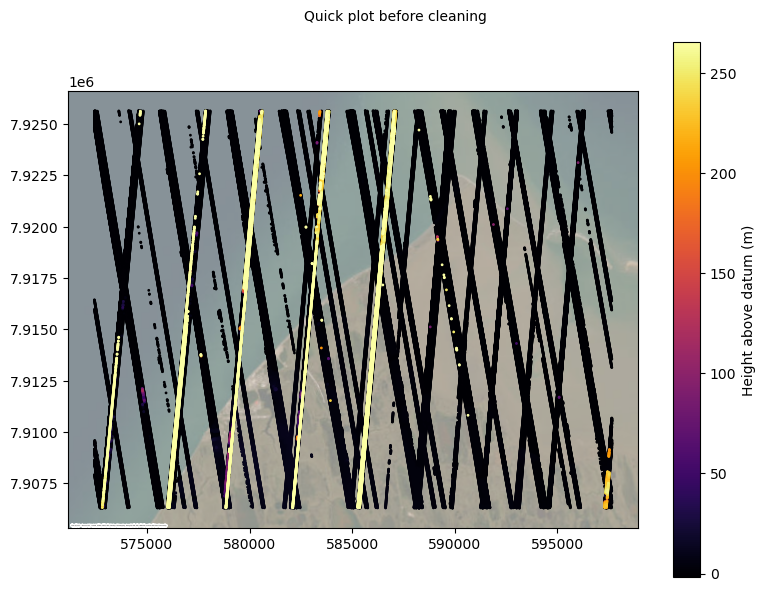

In [5]:
plotter.title = "Quick plot before cleaning"

plotter.plot_atl06(
    map_crs=map_crs,
    **ctx_kwargs
)

In [6]:
# Get only the data that is coincident with the DEM acquisition
plotter.clean_atl06(
    h_sigma_quantile=0.95,
    mask_worldcover_water=True,
    select_months=[4],
    select_years=[2022],
    save_to_csv=True,
    save_to_gpkg=True,
    filename_to_save=os.path.join(icesat_directory, "atl06_cleaned"),
)

,rgt,dh_fit_dx,gt,h_sigma,spot,pflags,n_fit_photons,w_surface_window_final,segment_id,region,rms_misfit,h_mean,x_atc,y_atc,cycle,geometry,esa-worldcover-.value,esa-worldcover-.flags,esa-worldcover-.file_id,esa-worldcover-.time
time,,,,,,,,,,,,,,,,,,,,
2022-04-17 01:15:56.210853120,381,-0.047549,10,0.048773,1,0,138,1.031103e+21,604607,5,0.512081,0.556896,12110909.0,3311.720459,15,POINT (-156.57676 71.35026),60.0,0,627065225216,1.309046e+12
2022-04-17 01:15:56.213661440,381,-0.022097,10,0.027673,1,0,300,1.031103e+21,604608,5,0.452866,-0.066967,12110929.0,3311.739014,15,POINT (-156.57684 71.35008),50.0,0,627065225216,1.309046e+12
2022-04-17 01:15:56.467525632,381,0.009508,10,0.006363,1,0,379,1.031103e+21,604698,5,0.123681,-0.307942,12112730.0,3309.855713,15,POINT (-156.5835 71.33408),90.0,0,627065225216,1.309046e+12
2022-04-17 01:15:56.470364160,381,0.004371,10,0.006248,1,0,362,1.031103e+21,604699,5,0.118864,-0.187099,12112750.0,3309.832031,15,POINT (-156.58357 71.3339),90.0,0,627065225216,1.309046e+12
2022-04-17 01:15:56.473201152,381,0.003172,10,0.005804,1,0,378,1.031103e+21,604700,5,0.112785,-0.125473,12112770.0,3309.790283,15,POINT (-156.58365 71.33372),90.0,0,627065225216,1.309046e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-17 01:15:57.725474560,381,-0.001089,60,0.017196,6,0,69,1.031103e+21,605033,5,0.118455,10.326173,12119434.0,-3314.025146,15,POINT (-156.79129 71.28218),90.0,0,627065225216,1.309046e+12
2022-04-17 01:15:57.728290560,381,0.003520,60,0.013848,6,0,84,1.031103e+21,605034,5,0.123033,10.347944,12119454.0,-3314.061279,15,POINT (-156.79136 71.282),90.0,0,627065225216,1.309046e+12
2022-04-17 01:15:57.731108608,381,-0.002322,60,0.015876,6,0,64,1.031103e+21,605035,5,0.125393,10.359776,12119474.0,-3314.073975,15,POINT (-156.79143 71.28182),90.0,0,627065225216,1.309046e+12


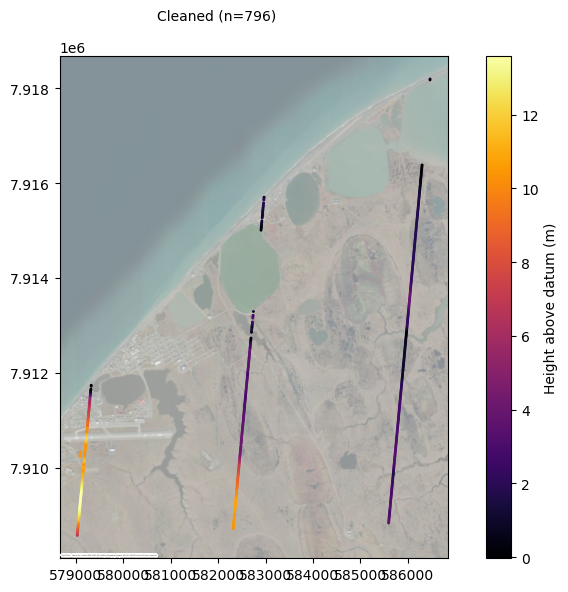

In [7]:
plotter.title = f"Cleaned (n={plotter.atl06_clean.shape[0]})"

plotter.plot_atl06(
    clean=True,
    map_crs=map_crs,
    **ctx_kwargs
)

/Users/ben/Desktop/uw-github/asp_plot/asp_plot/utils.py:288: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  gdf.plot(
/Users/ben/miniconda3/envs/asp_plot/lib/python3.12/site-packages/geopandas/plotting.py:308: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  collection = ax.scatter(x, y, cmap=cmap, **kwargs)


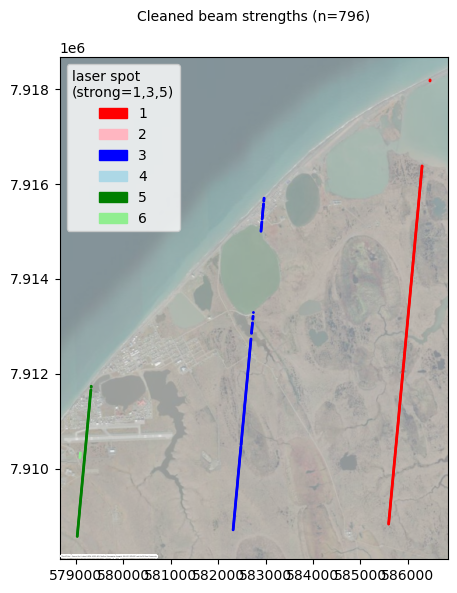

In [8]:
plotter.title = f"Cleaned beam strengths (n={plotter.atl06_clean.shape[0]})"

plotter.plot_atl06(
    clean=True,
    plot_beams=True,
    map_crs=map_crs,
    **ctx_kwargs
)


Comparing ATL06 to DEM. Gross mismatches or spatial trends may indicate a need for pc_align step.



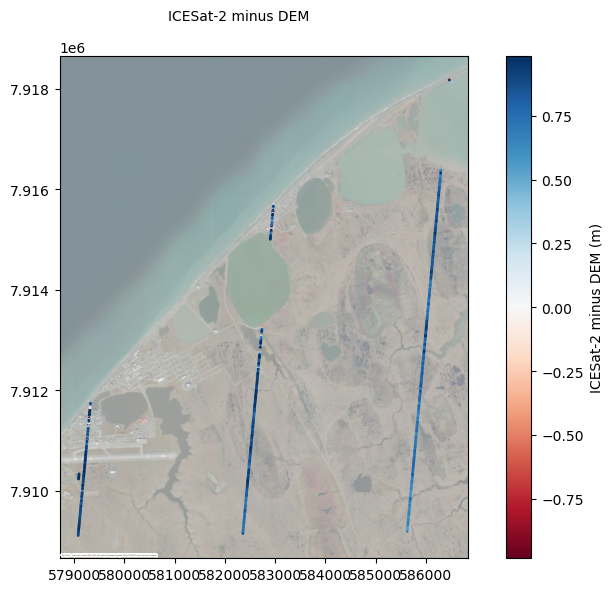

In [9]:
plotter.title = "ICESat-2 minus DEM"

plotter.compare_atl06_to_dem(**ctx_kwargs)

In [10]:
# Previous mismatch indicates need for pc_align step
plotter.pc_align_dem_to_atl06(
    atl06_csv=os.path.join(icesat_directory, "atl06_cleaned.csv"),
    output_prefix=os.path.join(directory, "pc_align/pc_align"),
)

--> Setting number of processing threads to: 4

Creating output directory: "/Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/pc_align".
Writing log info to: /Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/pc_align/pc_align-log-pc_align-07-21-1507-57455.txt
Will use datum (for CSV files): Geodetic Datum --> Name: WGS_1984  Spheroid: WGS 84  Semi-major axis: 6378137  Semi-minor axis: 6356752.3142451793  Meridian: Greenwich at 0  Proj4 Str: +proj=longlat +datum=WGS84 +no_defs
Computing the bounding boxes of the reference and source points using 9000000 sample points.
Computation of bounding boxes took 12.0248 [s]
Reference points box: Origin: (-156.826, 71.2694) width: 0.401829 height: 0.124855
Source points box:    Origin: (-156.796, 71.2663) width: 0.219649 height: 0.0842568
Intersection reference box:  Origin: (-156.796, 71.2694) width: 0.219649 height: 0.0811688
Intersection source    box:  Origin: (-156.796, 71.26

In [11]:
plotter.generate_translated_dem(
    pc_align_output=os.path.join(directory, "pc_align/pc_align-trans_reference.tif"),
    dem_out_fn=dem_fn.replace(".tif", "_pc_align_translated"),
)

--> Setting number of processing threads to: 4
Writing log info to: /Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/stereo_ba_50ips_10matches_dg_weight_image__ortho_0.35m_mode_asp_mgm_spm_9_corr_7_rfne_15_cost_4_refdem_COP30/20220417_2252_1040010074793300_1040010075633C00-DEM_1m_pc_align_translated-log-point2dem-07-21-1510-61144.txt
The point cloud files must have an equal number of channels which must be 4 or 6 to be able to remove outliers.

Point cloud extent estimation: [..........................................] 0%
Point cloud extent estimation: [..........................................] 1%
Point cloud extent estimation: [..........................................] 2%
Point cloud extent estimation: [*.........................................] 3%
Point cloud extent estimation: [*.........................................] 4%
Point cloud extent estimation: [**........................................] 5%
Point cloud extent estimation: [**........

In [12]:
# After pc_align, replace the dem with the new translated dem
plotter.dem_fn = dem_fn.replace(".tif", "_pc_align_translated-DEM.tif")


Comparing ATL06 to DEM. Gross mismatches or spatial trends may indicate a need for pc_align step.



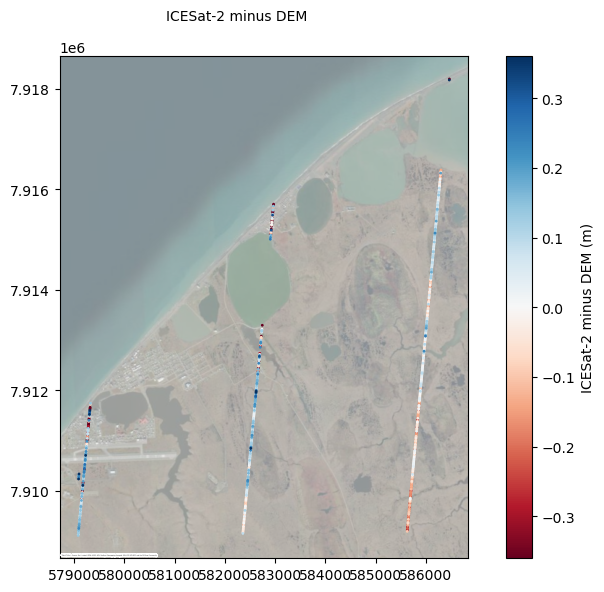

In [13]:
# Quickly compare the translated DEM to the ATL06 data
plotter.compare_atl06_to_dem(**ctx_kwargs)

In [14]:
# Gather a larger subset of data for validation
plotter.clean_atl06(
    h_sigma_quantile=0.95,
    mask_worldcover_water=True,
    select_months=[3, 4, 5],
    save_to_csv=False,
    save_to_gpkg=False,
    filename_to_save=os.path.join(icesat_directory, "atl06_cleaned_MarchAprilMay_allTime_for_validation"),
)

,rgt,dh_fit_dx,gt,h_sigma,spot,pflags,n_fit_photons,w_surface_window_final,segment_id,region,rms_misfit,h_mean,x_atc,y_atc,cycle,geometry,esa-worldcover-.value,esa-worldcover-.flags,esa-worldcover-.file_id,esa-worldcover-.time
time,,,,,,,,,,,,,,,,,,,,
2019-04-18 16:42:25.769822720,312,0.065633,30,0.013029,3,0,332,3.0,396700,3,0.236039,0.631266,7951167.5,4860.202637,3,POINT (-156.42639 71.26731),90.0,0,335007449088,1.309046e+12
2019-04-18 16:42:25.772639232,312,0.030151,30,0.012672,3,0,340,3.0,396701,3,0.230429,1.602373,7951187.5,4860.122559,3,POINT (-156.42646 71.26749),30.0,0,335007449088,1.309046e+12
2019-04-18 16:42:25.775465984,312,0.007473,30,0.007781,3,0,393,3.0,396702,3,0.153822,1.966851,7951207.5,4860.057129,3,POINT (-156.42653 71.26767),30.0,0,335007449088,1.309046e+12
2019-04-18 16:42:25.778304256,312,0.003653,30,0.007609,3,0,408,3.0,396703,3,0.153667,2.079865,7951227.5,4860.005371,3,POINT (-156.4266 71.26785),30.0,0,335007449088,1.309046e+12
2019-04-18 16:42:25.781146368,312,0.003946,30,0.007432,3,0,391,3.0,396704,3,0.145591,2.144606,7951248.0,4859.965820,3,POINT (-156.42668 71.26802),30.0,0,335007449088,1.309046e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-12 14:33:11.017872128,381,0.003314,20,0.025552,5,0,6,3.0,605076,5,0.062522,3.923541,12120295.0,3225.771484,23,POINT (-156.61347 71.26696),90.0,0,240518168576,1.309046e+12
2024-04-12 14:33:11.020683520,381,0.012694,20,0.037691,5,0,15,3.0,605077,5,0.109368,4.019473,12120315.0,3225.805908,23,POINT (-156.61354 71.26678),90.0,0,240518168576,1.309046e+12
2024-04-12 14:33:11.023492352,381,0.001141,20,0.051944,5,0,21,3.0,605078,5,0.229142,4.120587,12120335.0,3225.857666,23,POINT (-156.61361 71.2666),90.0,0,240518168576,1.309046e+12



Comparing ATL06 to DEM. Gross mismatches or spatial trends may indicate a need for pc_align step.



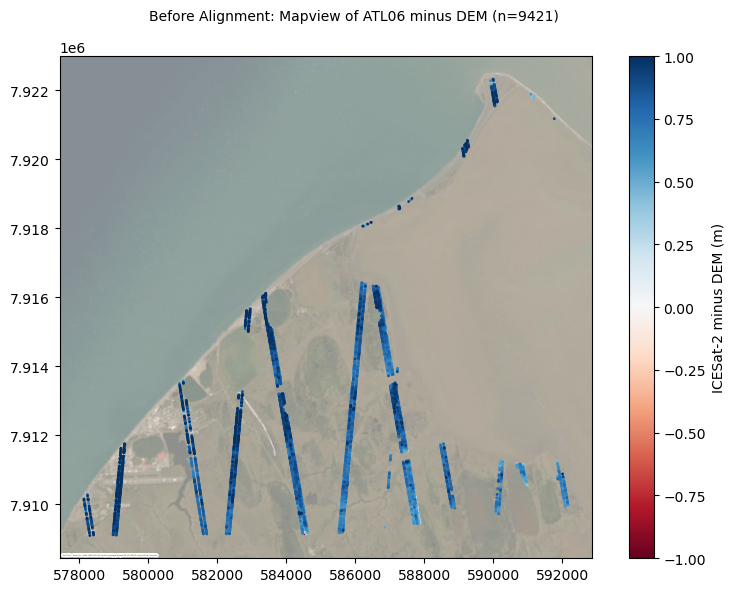

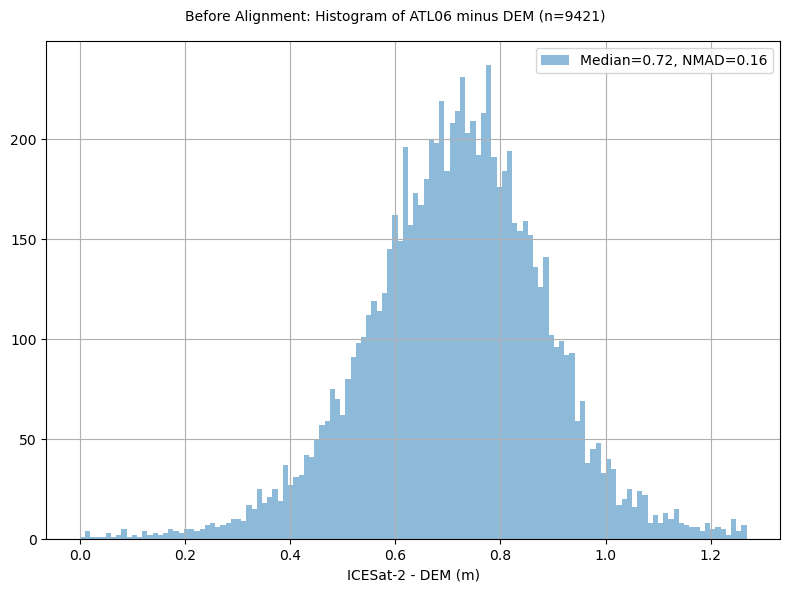

In [16]:
# Validate (before)
plotter.dem_fn = dem_fn

plotter.title = f"Before Alignment: Mapview of ATL06 minus DEM (n={plotter.atl06_clean.shape[0]})"
plotter.compare_atl06_to_dem(**ctx_kwargs)

plotter.title = f"Before Alignment: Histogram of ATL06 minus DEM (n={plotter.atl06_clean.shape[0]})"
plotter.atl06_dem_histogram()


Comparing ATL06 to DEM. Gross mismatches or spatial trends may indicate a need for pc_align step.



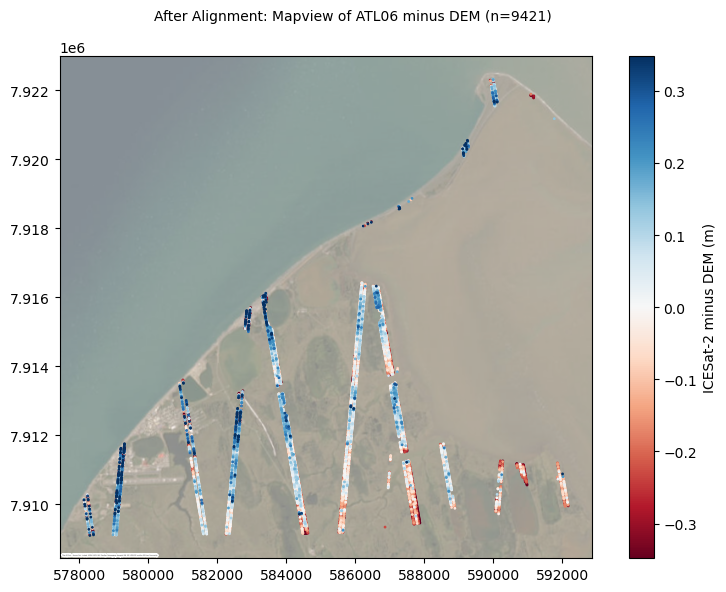

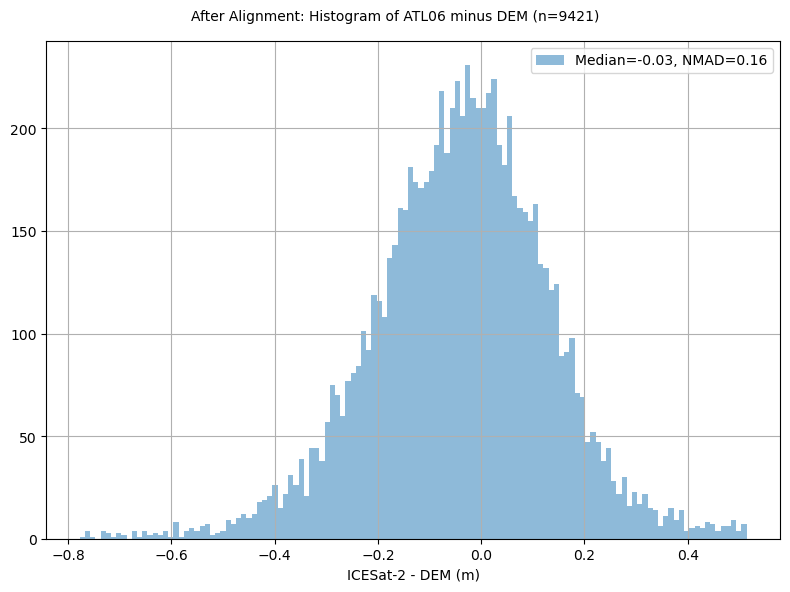

In [17]:
# Validate (after)
plotter.dem_fn = dem_fn.replace(".tif", "_pc_align_translated-DEM.tif")

plotter.title = f"After Alignment: Mapview of ATL06 minus DEM (n={plotter.atl06_clean.shape[0]})"
plotter.compare_atl06_to_dem(**ctx_kwargs)

plotter.title = f"After Alignment: Histogram of ATL06 minus DEM (n={plotter.atl06_clean.shape[0]})"
plotter.atl06_dem_histogram()